<a href="https://colab.research.google.com/github/Jonas1997Pereira/Introdu-o-Ci-ncia-de-Dados/blob/main/06_binary_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
#Importa as bibliotecas necessárias para manipulação de dados, visualização, e construção do modelo.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, ConfusionMatrixDisplay


In [57]:
# Gerando um conjunto de dados sintético com escalas desiguais
np.random.seed(42)
n_samples = 200

# Dados sintéticos
profundidade_banda_rodagem = np.random.uniform(2, 10, n_samples)  # Profundidade da banda de rodagem variando de 2 mm a 10 mm
desgaste_percentual = np.random.uniform(0, 100, n_samples)  # Desgaste percentual variando de 0% a 100%
km_rodados = np.random.uniform(5000, 60000, n_samples)  # Quilometragem variando de 5.000 km a 60.000 km

# Definindo as classes com base em critérios mais realistas
# Profundidade < 3 mm, desgaste > 50% ou km > 40.000 indicam pneu velho (classe 1)
classes = np.where((profundidade_banda_rodagem < 3) | (desgaste_percentual > 50) | (km_rodados > 40000), 1, 0)


In [58]:
# Conjunto de dados
X = np.column_stack((profundidade_banda_rodagem, desgaste_percentual, km_rodados))
y = classes

# Dividindo o conjunto de dados em treino e teste (sem padronização)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Aplicando a padronização aos dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [59]:
# Treinando o modelo kNN (sem padronização)
k = 5
knn_no_scaling = KNeighborsClassifier(n_neighbors=k)
knn_no_scaling.fit(X_train, y_train)

# Treinando o modelo kNN (com padronização)
knn_with_scaling = KNeighborsClassifier(n_neighbors=k)
knn_with_scaling.fit(X_train_scaled, y_train)


KNeighborsClassifier()

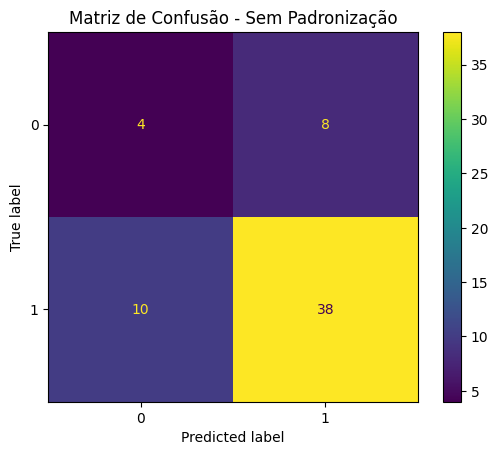

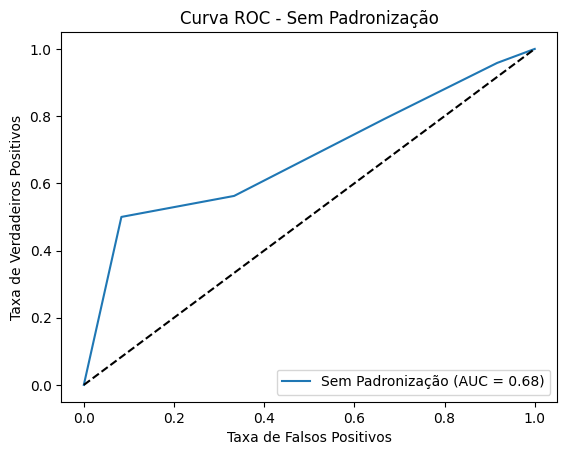

In [60]:
# Avaliação do modelo sem padronização
y_pred_no_scaling = knn_no_scaling.predict(X_test)

# Matriz de confusão
cm_no_scaling = confusion_matrix(y_test, y_pred_no_scaling)
ConfusionMatrixDisplay(cm_no_scaling).plot()
plt.title("Matriz de Confusão - Sem Padronização")
plt.show()

# Curva ROC e AUC
y_prob_no_scaling = knn_no_scaling.predict_proba(X_test)[:, 1]
fpr_no_scaling, tpr_no_scaling, thresholds_no_scaling = roc_curve(y_test, y_prob_no_scaling)
auc_score_no_scaling = roc_auc_score(y_test, y_prob_no_scaling)

plt.plot(fpr_no_scaling, tpr_no_scaling, label=f'Sem Padronização (AUC = {auc_score_no_scaling:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC - Sem Padronização')
plt.legend(loc='lower right')
plt.show()


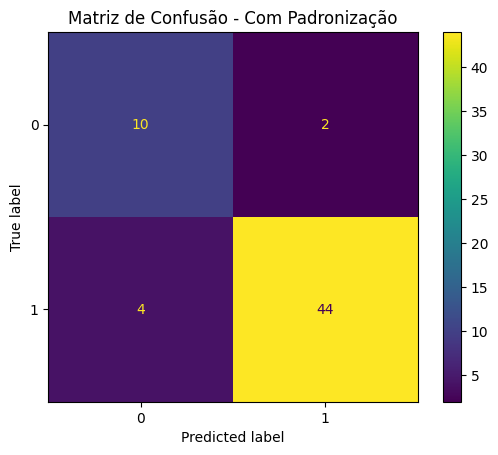

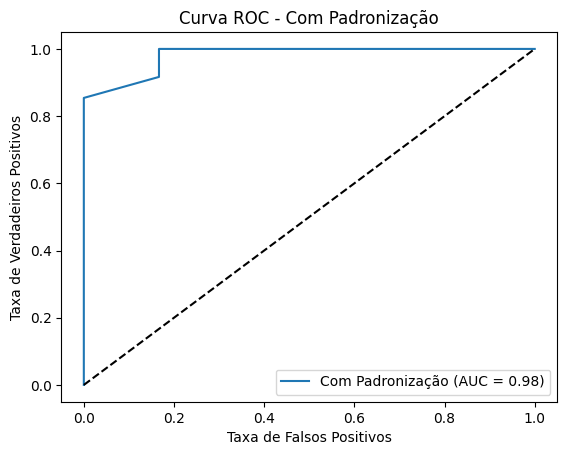

In [61]:
# Avaliação do modelo com padronização
y_pred_with_scaling = knn_with_scaling.predict(X_test_scaled)

# Matriz de confusão
cm_with_scaling = confusion_matrix(y_test, y_pred_with_scaling)
ConfusionMatrixDisplay(cm_with_scaling).plot()
plt.title("Matriz de Confusão - Com Padronização")
plt.show()

# Curva ROC e AUC
y_prob_with_scaling = knn_with_scaling.predict_proba(X_test_scaled)[:, 1]
fpr_with_scaling, tpr_with_scaling, thresholds_with_scaling = roc_curve(y_test, y_prob_with_scaling)
auc_score_with_scaling = roc_auc_score(y_test, y_prob_with_scaling)

plt.plot(fpr_with_scaling, tpr_with_scaling, label=f'Com Padronização (AUC = {auc_score_with_scaling:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC - Com Padronização')
plt.legend(loc='lower right')
plt.show()


In [62]:
# Função para prever a condição de um novo pneu
def prever_pneu(knn_model, scaler=None):
    profundidade = float(input("Digite a profundidade da banda de rodagem do pneu (mm): "))
    desgaste = float(input("Digite o desgaste percentual do pneu (%): "))
    km = float(input("Digite a quilometragem rodada do pneu (km): "))

    # Dados do novo pneu
    pneu_novo = np.array([[profundidade, desgaste, km]])

    # Padronizando os dados do novo pneu, se necessário
    if scaler:
        pneu_novo = scaler.transform(pneu_novo)

    # Fazendo a previsão
    predicao = knn_model.predict(pneu_novo)
    if predicao[0] == 0:
        print("O pneu é NOVO.")
    else:
        print("O pneu é VELHO.")

# Prevendo a condição do pneu sem padronização
print("Modelo sem padronização:")
prever_pneu(knn_no_scaling)

# Prevendo a condição do pneu com padronização
print("Modelo com padronização:")
prever_pneu(knn_with_scaling, scaler)


Modelo sem padronização:
Digite a profundidade da banda de rodagem do pneu (mm): 9
Digite o desgaste percentual do pneu (%): 50
Digite a quilometragem rodada do pneu (km): 50000
O pneu é VELHO.
Modelo com padronização:
Digite a profundidade da banda de rodagem do pneu (mm): 5
Digite o desgaste percentual do pneu (%): 23
Digite a quilometragem rodada do pneu (km): 500
O pneu é NOVO.


In [63]:
print("Conclusão:")
print("1. O modelo kNN teve melhor desempenho quando os dados foram padronizados, devido às grandes diferenças de escala entre as variáveis.")
print("2. A padronização reduz a influência desproporcional de variáveis com escalas maiores, permitindo que o modelo kNN faça previsões mais equilibradas.")
print("3. A curva ROC e a AUC mostraram que a padronização ajudou a melhorar a capacidade discriminativa do modelo.")


Conclusão:
1. O modelo kNN teve melhor desempenho quando os dados foram padronizados, devido às grandes diferenças de escala entre as variáveis.
2. A padronização reduz a influência desproporcional de variáveis com escalas maiores, permitindo que o modelo kNN faça previsões mais equilibradas.
3. A curva ROC e a AUC mostraram que a padronização ajudou a melhorar a capacidade discriminativa do modelo.
